In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta  # Only needed for theoretical PDF

Parameters

In [3]:
alpha_prior = 1
beta_prior = 19
n = 10000

Generate samples using numpy.random

In [4]:
np.random.seed(42)
i_samples = np.random.beta(alpha_prior, beta_prior, n)  # Beta samples
t_samples = np.random.binomial(n=1, p=i_samples)  # Bernoulli samples (0/1)

Split samples based on texting outcome

In [5]:
i_given_t1 = i_samples[t_samples == 1]
i_given_t0 = i_samples[t_samples == 0]

Create figure with two subplots

In [6]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

Function to plot histograms with overlaid distributions

In [7]:
def plot_distribution(data, ax, title, condition):
    # Plot histogram
    ax.hist(data, bins=50, density=True, color='blue', alpha=0.7, label='Samples')
    
    # Calculate theoretical distribution
    x = np.linspace(0, 1, 1000)
    if condition == 1:
        # Posterior parameters when t=1: Beta(α+1, β)
        pdf = beta.pdf(x, alpha_prior + 1, beta_prior)
    else:
        # Posterior parameters when t=0: Beta(α, β+1)
        pdf = beta.pdf(x, alpha_prior, beta_prior + 1)
    
    # Plot theoretical distribution
    ax.plot(x, pdf, 'r-', lw=2, label='Theoretical PDF')
    ax.set_title(title)
    ax.set_xlabel('Interest Level (i)')
    ax.set_ylabel('Density')
    ax.legend()

Plot for t=1

In [8]:
ax1 = plt.subplot(1, 2, 1)
plot_distribution(i_given_t1, ax1, r'$p(i \mid t=1)$', condition=1)

Plot for t=0

In [9]:
ax2 = plt.subplot(1, 2, 2)
plot_distribution(i_given_t0, ax2, r'$p(i \mid t=0)$', condition=0)

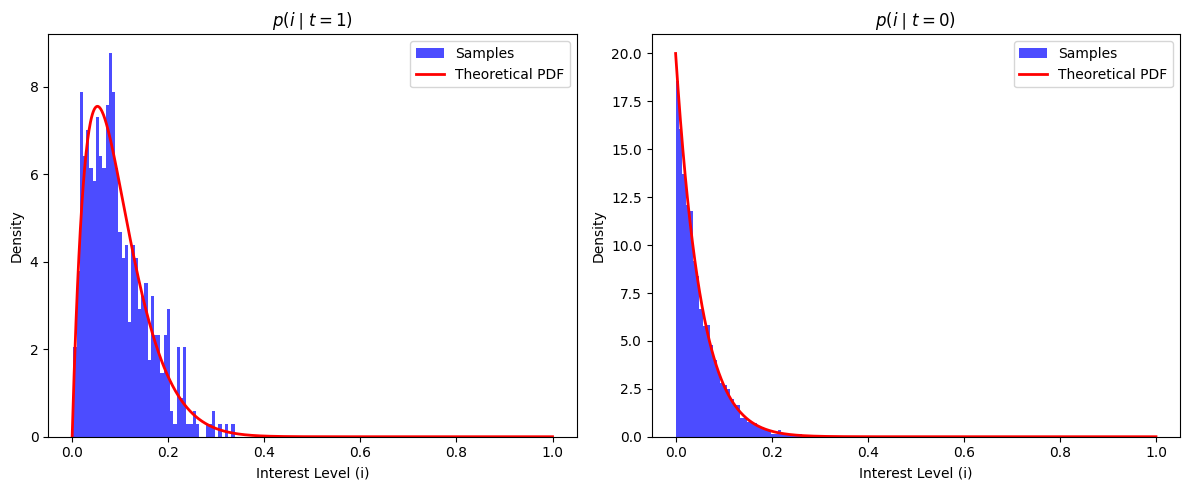

In [10]:
plt.tight_layout()
plt.show()

Calculate probabilities

In [11]:
prob_i_gt_0_1_t1 = np.mean(i_given_t1 > 0.1) if len(i_given_t1) > 0 else 0.0
prob_i_gt_0_1_t0 = np.mean(i_given_t0 > 0.1) if len(i_given_t0) > 0 else 0.0

In [12]:
print(f"Probability of interest > 10% given they texted back: {prob_i_gt_0_1_t1:.4f}")
print(f"Probability of interest > 10% given they didn't text back: {prob_i_gt_0_1_t0:.4f}")

Probability of interest > 10% given they texted back: 0.3882
Probability of interest > 10% given they didn't text back: 0.1249
